In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import pickle
import imageio
import itertools
from scipy import stats

In [5]:
object_location = pd.read_csv('/Users/angelaradulescu/Dropbox/NYU/Research/TaskVR/VisualSearchGazeData/location/location_all_objects.csv')
indexes = np.unique(object_location['scene'].values, return_index=True)[1]
all_scenes = [object_location['scene'].values[index] for index in sorted(indexes)]

### Compute location similarity for all pairs of possible objects.

In [3]:
similarity_matrices = []

for s in all_scenes: 
    
    print(s)
    
    ## Subset scene and get object pairs.
    this_scene = object_location[object_location['scene'] == s]
    objects_in_scene = this_scene['object'].values
    n_objects = objects_in_scene.shape[0]
    object_position = this_scene[['x_pos_pixel_360', 'y_pos_pixel_360']].values
    object_pairs = list(itertools.combinations(np.arange(n_objects), 2))
    
    ## Compute pairwise similarity.
    similarity_matrix = np.zeros((n_objects, n_objects))
    for p in object_pairs:
        
        object_1_idx = p[0]
        object_2_idx = p[1]

        similarity_matrix[object_1_idx,object_2_idx] = np.linalg.norm(object_position[object_1_idx,:]-object_position[object_2_idx,:])
    
    similarity_matrices.append(similarity_matrix)

Kitchen Location 1 Trial 9
Kitchen Location 2 Trial 3
Kitchen Location 2 Trial 4
Living Room Location 4 Trial 5
Studio Location 3 Trial 3
Studio Location 5 Trial 3
Bedroom Location 5 Trial 5
Guest Bedroom Location 3 Trial 5
Living Room Location 5 Trial 10
Bedroom Location 1 Trial 8
Bedroom Location 4 Trial 2
Studio Location 2 Trial 1
Guest Bedroom Location 3 Trial 7
Kitchen Location 3 Trial 10
Guest Bedroom Location 1 Trial 9
Guest Bedroom Location 3 Trial 8
Guest Bedroom Location 5 Trial 10
Bathroom Location 3 Trial 7
Bathroom Location 1 Trial 8
Living Room Location 3 Trial 8
Studio Location 4 Trial 9
Kitchen Location 2 Trial 2
Living Room Location 1 Trial 2
Kitchen Location 2 Trial 8
Bathroom Location 3 Trial 3
Kitchen Location 5 Trial 4
Kitchen Location 4 Trial 6
Bedroom Location 2 Trial 1
Kitchen Location 5 Trial 8
Studio Location 4 Trial 1
Guest Bedroom Location 5 Trial 1
Kitchen Location 5 Trial 7
Guest Bedroom Location 1 Trial 8
Studio Location 3 Trial 8
Bedroom Location 4 Trial

Kitchen Location 4 Trial 3
Living Room Location 2 Trial 10
Studio Location 4 Trial 8
Studio Location 2 Trial 4
Bathroom Location 1 Trial 10
Studio Location 5 Trial 1
Bedroom Location 4 Trial 4
Kitchen Location 1 Trial 4
Bedroom Location 1 Trial 5
Living Room Location 3 Trial 4


### Z-score and shift around 0 to get a reward proxy. 

In [4]:
def reward_transform(m):
    
    n_objects = m.shape[0]
    m_zscored = stats.zscore(m[np.triu_indices(n_objects)])
    m_reward = np.zeros((n_objects,n_objects))    
    m_reward[np.triu_indices(m_reward.shape[0])] = m_zscored - np.min(m_zscored)
    
    return m_reward

transformed_similarity_matrices = [reward_transform(m) for m in similarity_matrices]

### Save. 

In [6]:
scene_idx = 0
for s in all_scenes:
    
    # Convert to csv.
    this_scene = object_location[object_location['scene'] == s]
    objects_in_scene = this_scene['object'].values
    df = pd.DataFrame(transformed_similarity_matrices[scene_idx] + transformed_similarity_matrices[scene_idx].T)
    df.columns = objects_in_scene
    df.insert(0, 'object', objects_in_scene)
    
    # Save. 
    df.to_csv('data/location/similarity/' + s + '.csv', index=False)
    
    scene_idx = scene_idx + 1

### Plot example. 

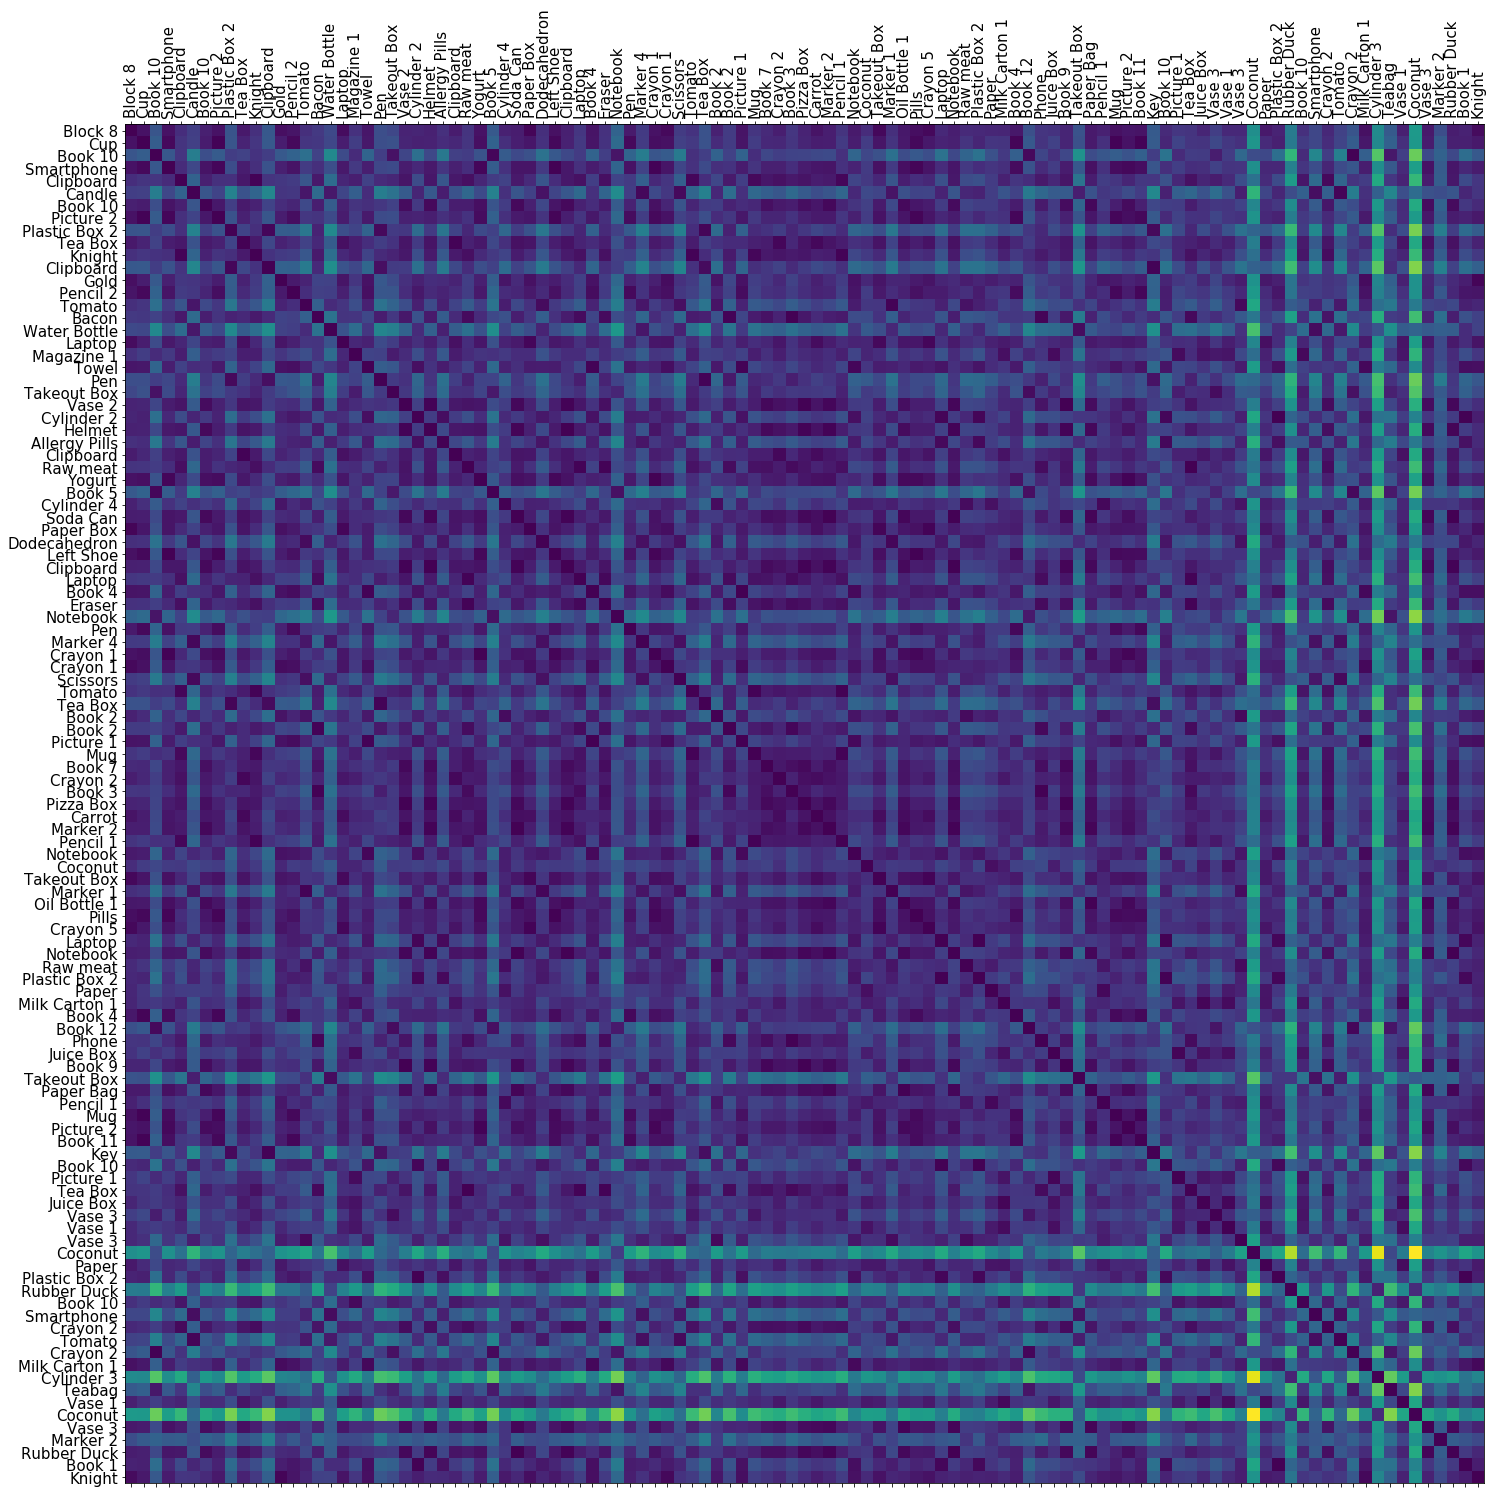

In [80]:
fig, ax = plt.subplots(figsize=(25,25))
# cax = ax.matshow(similarity_df.values, cmap='viridis', vmin=0, vmax=1000000)
cax = ax.matshow(df.values, cmap='viridis')
ax.set_xticks(np.arange(len(objects_in_scene)))
ax.set_xticklabels(objects_in_scene)
ax.set_yticks(np.arange(len(objects_in_scene)))
ax.set_yticklabels(objects_in_scene)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()